# Spring의 전체적인 실행 순서 / 출처:devpad.tistory.com/24

+ Spring MVC 프로젝트의 기본 구조
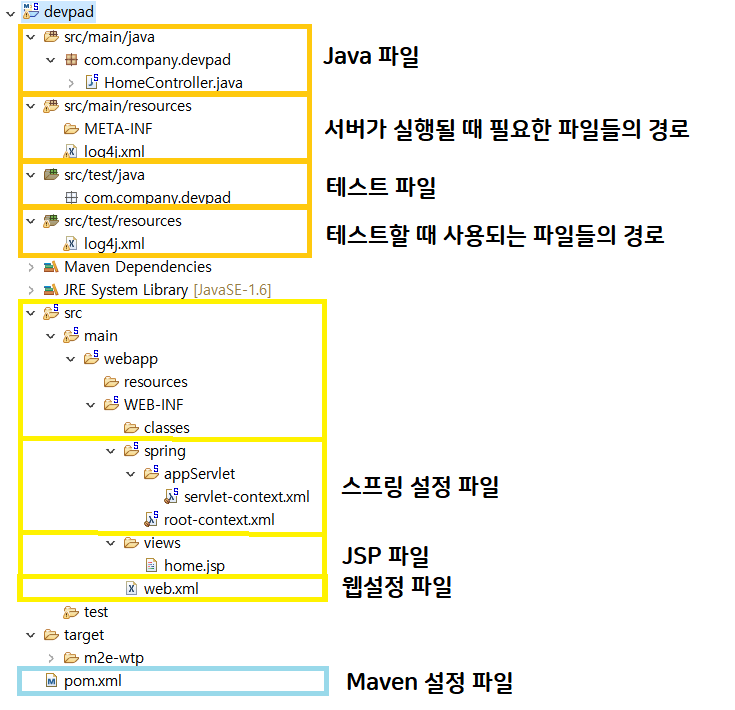

+ Spring의 전체적인 실행 순서
  + Request -> DispatcherServlet -> HandlerMapping -> (Controller -> Service -> DAO -> DB -> DAO -> Service -> Controller) -> DispatcherServlet -> ViewResolver -> View -> DispatcherServlet -> Response
  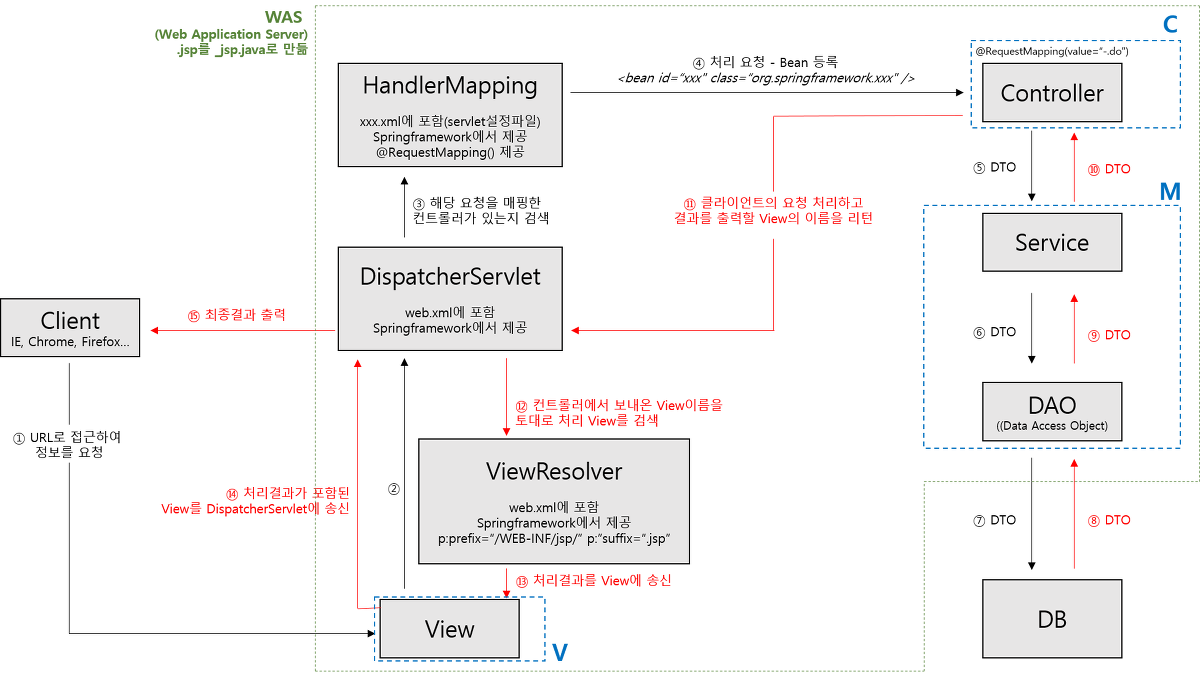

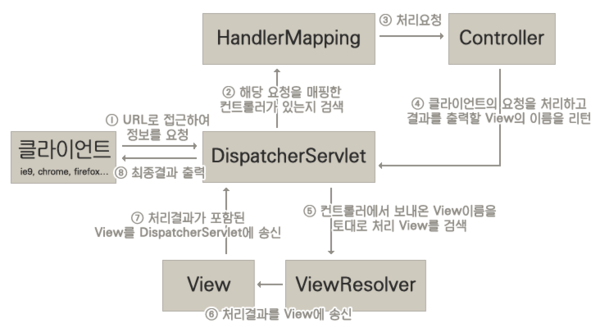

+ 실제 작동 방식

  + 클라이언트가 Request 요청을 하면, DispatcherServlet이  web.xml 등록된 내용이면 가로챈다.
  + 가로챈 요청을 HandlerMapping에게 보내 Controller를 탐색
  + 실제 로직 처리 (Controller -> Service -> DAO -> DB ->DAO -> Service -> Controller)
  + 3의 로직 처리 후 ViewResolver를 통해 view 화면 탐색
  + 찾은 View 화면을 View에 보내면 이 결과를 다시 DispatcherSevlet에 보내고, 최종 클라이언트에 전송


+ web.xml
  + WAS가 최초 구동될 때 WEB_INF 디렉토리에 존재하는 web.xml를 읽고, 그에 해당하는 웹 어플리케이션 설정을 구성.
  + 각 종 설정을 위한 설정파일.

```
<?xml version="1.0" encoding="UTF-8"?>
<web-app version="2.5" xmlns="http://java.sun.com/xml/ns/javaee"
 xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
 xsi:schemaLocation="http://java.sun.com/xml/ns/javaee https://java.sun.com/xml/ns/javaee/web-app_2_5.xsd">
 
 <!-- The definition of the Root Spring Container shared by all Servlets and Filters -->
 <context-param>
 <param-name>contextConfigLocation</param-name>
 <param-value>/WEB-INF/spring/root-context.xml</param-value>
 </context-param>
 
 <!-- Creates the Spring Container shared by all Servlets and Filters -->
 <listener>
 <listener-class>org.springframework.web.context.ContextLoaderListener</listener-class>
 </listener>
 
 <!-- Processes application requests -->
 <servlet>
 <servlet-name>appServlet</servlet-name>
 <servlet-class>org.springframework.web.servlet.DispatcherServlet</servlet-class>
 <init-param>
 <param-name>contextConfigLocation</param-name>
 <param-value>/WEB-INF/spring/appServlet/servlet-context.xml</param-value>
 </init-param>
 <load-on-startup>1</load-on-startup>
 </servlet>
 
 <servlet-mapping>
 <servlet-name>appServlet</servlet-name>
 <url-pattern>/</url-pattern>
 </servlet-mapping>
</web-app>
```

+ web 안에 요소들
    + ```<servlet>``` : DispatcherServlet을 구현하기 위한 정보를 포함
    + ```<servlet-name>``` :  해당 서블렛 이름을 지정하면 이 지정된 이름을 가지고 다른 설정 파일에서 해당 서블릿 정보를 참조 ( 서블릿 이름 지정)
    + ```<servelt-class>``` : 어떤 클래스를 가지고 DispatcherSevlet을 구현할 것인지를 명시
    + ```<init-param>``` : 초기화 파라미터, servlet에 대한 설정 정보. 기술되지 않았다면 appServlet-context.xml을 이용하여 스프링 컨테이너 생성
    + ```<load-on-startup>``` : 서블릿이 로딩될 때 로딩 순서를 결정하는 값. 톰캣이 구동되고 서블릿이 로딩되기 전에 해당 서블릿에 요청이 들어오면 서블릿이 구동되기 전까지 기다려야 함. 이 중 우선순위가 높은 서블릿부터 구동할 때 쓰이는 값.
    + ```<servlet-mapping>``` : 서블릿이 ```<url-pattern>```에서 지정한 패턴으로 클라이언트 요청이 들어오면 해당 ```<servlet-name>```을 가진 servlet에게 이 요청을 토스하는 정보를 기술.

+ root-context.xml
```
<?xml version="1.0" encoding="UTF-8"?>
<beans xmlns="http://www.springframework.org/schema/beans"
 xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
 xsi:schemaLocation="http://www.springframework.org/schema/beans https://www.springframework.org/schema/beans/spring-beans.xsd">
<!-- Root Context: defines shared resources visible to all other web components -->
</beans>
```

  + servlet-context.xml
    - servlet에 관한 설정. 주목해야 하는 부분 prefix, suffix 부분!
    - prefix : 접두사를 붙여주는 역할
    - suffix : 접미사를 붙여주는 역할
    - 만약 설정시에 전체경로와 .jsp를 붙이지 않아도 되도록 도와준다.
    

```

<?xml version="1.0" encoding="UTF-8"?>
<beans:beans xmlns="http://www.springframework.org/schema/mvc"
 xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
 xmlns:beans="http://www.springframework.org/schema/beans"
 xmlns:context="http://www.springframework.org/schema/context"
 xsi:schemaLocation="http://www.springframework.org/schema/mvc https://www.springframework.org/schema/mvc/spring-mvc.xsd
 http://www.springframework.org/schema/beans https://www.springframework.org/schema/beans/spring-beans.xsd
 http://www.springframework.org/schema/context https://www.springframework.org/schema/context/spring-context.xsd">
 
 <!-- DispatcherServlet Context: defines this servlet's request-processing infrastructure -->
 
 <!-- Enables the Spring MVC @Controller programming model -->
 <annotation-driven />
 
 <!-- Handles HTTP GET requests for /resources/** by efficiently serving up static resources in the ${webappRoot}/resources directory -->
 <resources mapping="/resources/**" location="/resources/" />
 
 <!-- Resolves views selected for rendering by @Controllers to .jsp resources in the /WEB-INF/views directory -->
 <beans:bean class="org.springframework.web.servlet.view.InternalResourceViewResolver">
 <beans:property name="prefix" value="/WEB-INF/views/" />
 <beans:property name="suffix" value=".jsp" />
 </beans:bean>
 
 <context:component-scan base-package="com.company.devpad" />
</beans:beans>

```

 + 
  + ```<context:component-scan base-package="com.company.first"/>``` : 스프링에서 사용하는 bean을 일일이 xml에 선언하지 않고도 필요한 어노테이션을 자동으로 인식하게 하는 역할

+ 
  + ```<resources>``` : 정적인 html문서 같은 웹 리소스 정보를 기술하는 태그
  + ```<beans:bean class;"org.springframework.web.servlet.view.InternalResourceBiewResolver">``` : Controller가 Model를 리턴하고 DispatcherServlet이 jsp 파일을 찾을 때 쓰이는 정보를 기술하는 태그. 만약 "home"이라는 문자열을 반환하면 /WEB-INF/views/경로에서 접미사가 .jsp인 해당 파일을 찾음. "home" -> /WEB-INF/views/home.jsp
  + ```<context:component-scan>``` Java파일의 @Component로 등록된 Bean 객체를 찾도록 해주는 태그

+ 자바 컨트롤러 파일

```
package com.company.devpad;
import java.text.DateFormat; ...
 
@Controller
public class HomeController {
 
    private static final Logger logger = LoggerFactory.getLogger(HomeController.class);
 
    @RequestMapping(value = "/", method = RequestMethod.GET)
    public String home(Locale locale, Model model) {
        logger.info("Welcome home! The client locale is {}.", locale);
 
        Date date = new Date();
        DateFormat dateFormat = DateFormat.getDateTimeInstance(DateFormat.LONG, DateFormat.LONG, locale);
 
        String formattedDate = dateFormat.format(date);
 
        model.addAttribute("serverTime", formattedDate);
 
        return "home";
    }
}
```

+ 
  + @Controller : 어노테이션을 붙이면 servlet-context.xml에서 이 것을 인식하여 컨트롤러로 등록함
  + @RequestMapping : 스프링은 HandlerMapping에 의해 컨트롤러가 결정. 이 컨트롤러에서 HandlerAdapter에 의해 실행 메서드가 결정되는 데 @RequestMapping 어노테이션이 그 정보를 제공. value에 해당되는 url이 GET 방식으로 요청이 들어올 때 해당 메서드를 실행. home 메서드는 serverTime이라는 속성을 Model에 추가하고 이 값은 formattedDate 변수 안에 담긴 현재 날짜 정보를 담고 있다. 이 정보는 JSP에서 클라이언트에게 전달할 HTML 문서를 만들 때 쓰인다. 모델은 어떤 구조화된 데이터를 담는 객체라고 보면 된다.
  + 

+ JSP 파일

+ 
  + home.jsp
  + ```<%@ taglib uri="http://java.sun.com/jsp/jstl/core" prefix="c" %>
<%@ page session="false" %>
<html>
<head>
    <title>Home</title>
</head>
<body>
<h1>
    Hello world!  
</h1>
<P>  The time on the server is ${serverTime}. </P>
</body>
</html>
```

  + JSP 파일은 Model 객체를 넘겨받고 그 Model 객체 안의 속성 값들의 정보를 ${} 기호에 표현된 부분에 치환한다. 예를 들어 ${serverTime}은 Model에서 addAttribute 메서드를 통해 추가했던 serverTime 정보인 현재 날짜를 담고 있다.